## 응용통계학과 32152339 송준영 

# Explarotary Data Analysis (with pandas)

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns   #그래프가 더이쁘게 나옴
import warnings
import io

In [3]:
rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 20)
pd.set_option("display.precision", 2)
warnings.simplefilter('ignore')

## 데이터 다운로드

데이터는 [Dacon 단국대 소/중 데이터 분석 AI 경진대회 웹사이트](https://www.dacon.io/competitions/official/235638/data/)에서 다운로드 받아 `../input` 폴더에 저장.

## EDA

### 학습데이터 로드

In [206]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [207]:
# !ls "/gdrive/My Drive/Colab Notebooks"

In [208]:
# trn = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv')
# print(trn.shape)
# trn.head()

In [17]:
trn = pd.read_csv('C:/python/DACON_DATA/train.csv',index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.26,20.34,19.01,17.67,16.94,-8.11e-05,23.12,20.26,18.96,17.63,16.91,18,18,1.19,1.19,1.19,1.19,1.19,0
1,15.05,14.06,13.45,13.27,13.17,4.51e-03,14.97,14.00,13.41,13.24,13.13,1,1,1.25,1.26,1.25,1.25,1.26,1
2,16.79,15.83,15.54,15.39,15.35,4.72e-04,16.61,15.69,15.44,15.32,15.30,2,2,1.02,1.02,1.02,1.02,1.02,0
3,25.66,21.19,20.22,19.89,19.63,5.81e-06,25.35,20.99,20.09,19.79,19.56,4,3,1.21,1.21,1.20,1.21,1.21,0
4,24.45,20.70,19.04,18.32,17.98,-3.32e-05,23.77,20.43,18.86,18.19,17.88,13,12,1.19,1.19,1.19,1.19,1.19,0


In [18]:
trn.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
319995,18.37,17.24,16.77,16.48,16.34,5.20e-02,18.13,17.04,16.64,16.39,16.29,2,2,1.09,1.09,1.10,1.10,1.09,2
319996,18.69,17.67,17.19,16.82,16.64,8.73e-02,18.52,17.51,17.09,16.74,16.60,2,2,1.05,1.05,1.05,1.05,1.05,1
319997,21.19,18.42,17.30,16.90,16.68,-1.01e-05,20.99,18.31,17.22,16.84,16.64,31,30,1.19,1.19,1.19,1.19,1.19,0
319998,18.85,17.32,16.51,16.18,15.91,-4.52e-05,16.39,15.41,15.18,15.20,15.18,1,1,1.17,1.17,1.17,1.17,1.17,0
319999,19.86,18.82,18.52,18.41,18.31,-9.65e-04,19.83,18.78,18.49,18.40,18.31,1,1,1.06,1.06,1.06,1.06,1.06,0


### 데이터 개요

In [19]:
trn.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00
mean,19.85,18.38,17.74,17.17,16.88,5.83e-02,19.63,18.23,17.62,17.15,16.87,6.33,6.14,1.18,1.18,1.18,1.18,1.18,1.12
std,1.95,31.11,1.47,52.56,57.15,5.75e-01,1.92,17.79,1.47,25.08,35.44,8.88,8.55,0.12,0.12,0.11,0.12,0.12,0.92
min,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,18.72,17.47,16.88,16.52,16.29,3.56e-05,18.56,17.35,16.79,16.45,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09,0.00
50%,19.42,18.14,17.53,17.15,16.92,4.71e-02,19.26,18.02,17.44,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18,1.00
75%,20.43,19.07,18.43,18.01,17.73,9.46e-02,20.20,18.89,18.29,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23,2.00
max,58.62,46.34,72.01,50.16,52.61,6.23e+01,30.78,30.61,31.96,32.02,30.78,44.00,42.00,2.05,2.08,2.02,2.04,2.07,2.00


In [20]:
trn.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

### 종속변수 분포

In [21]:
trn['class'].value_counts().sort_index()

0    119996
1     42785
2    157219
Name: class, dtype: int64

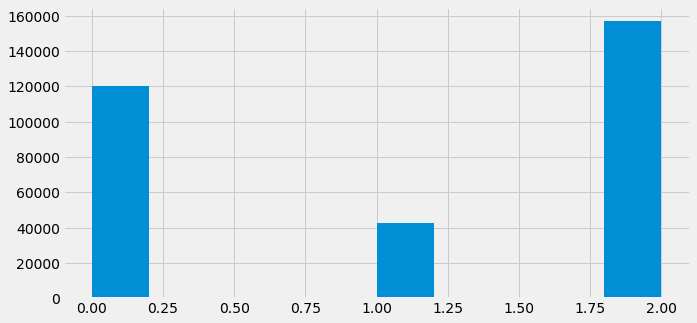

In [22]:
trn['class'].hist()

### 독립변수 분포

In [23]:
trn.quantile(np.arange(0,1,.01))

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,0.0
0.01,16.51,15.32,14.79,14.46,14.18,-8.99e-04,15.84,14.73,14.32,14.12,13.95,1.0,1.0,1.01,1.01,1.01,1.01,1.01,0.0
0.02,16.88,15.69,15.18,14.87,14.60,-6.76e-04,16.48,15.33,14.89,14.63,14.42,1.0,1.0,1.01,1.01,1.01,1.01,1.01,0.0
0.03,17.11,15.91,15.40,15.10,14.83,-5.48e-04,16.78,15.63,15.19,14.93,14.70,1.0,1.0,1.01,1.01,1.01,1.01,1.01,0.0
0.04,17.29,16.09,15.55,15.25,15.01,-4.51e-04,17.00,15.84,15.37,15.11,14.89,1.0,1.0,1.02,1.02,1.02,1.02,1.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,24.06,21.84,20.48,19.68,19.44,1.82e-01,23.82,21.55,20.34,19.60,19.38,27.0,26.0,1.39,1.40,1.39,1.39,1.40,2.0
0.96,24.40,22.14,20.68,19.87,19.63,1.95e-01,24.09,21.88,20.55,19.79,19.58,28.0,27.0,1.41,1.41,1.40,1.40,1.41,2.0
0.97,24.80,22.47,20.96,20.06,19.85,2.15e-01,24.40,22.29,20.86,19.98,19.80,30.0,29.0,1.43,1.44,1.43,1.43,1.44,2.0
0.98,25.26,22.82,21.28,20.25,20.13,2.45e-01,24.72,22.68,21.19,20.17,20.09,32.0,30.0,1.50,1.52,1.49,1.50,1.51,2.0


In [11]:
trn.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00
mean,159999.50,19.85,18.38,17.74,17.17,16.88,5.83e-02,19.63,18.23,17.62,17.15,16.87,6.33,6.14,1.18,1.18,1.18,1.18,1.18,1.12
std,92376.19,1.95,31.11,1.47,52.56,57.15,5.75e-01,1.92,17.79,1.47,25.08,35.44,8.88,8.55,0.12,0.12,0.11,0.12,0.12,0.92
min,0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,79999.75,18.72,17.47,16.88,16.52,16.29,3.56e-05,18.56,17.35,16.79,16.45,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09,0.00
50%,159999.50,19.42,18.14,17.53,17.15,16.92,4.71e-02,19.26,18.02,17.44,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18,1.00
75%,239999.25,20.43,19.07,18.43,18.01,17.73,9.46e-02,20.20,18.89,18.29,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23,2.00
max,319999.00,58.62,46.34,72.01,50.16,52.61,6.23e+01,30.78,30.61,31.96,32.02,30.78,44.00,42.00,2.05,2.08,2.02,2.04,2.07,2.00


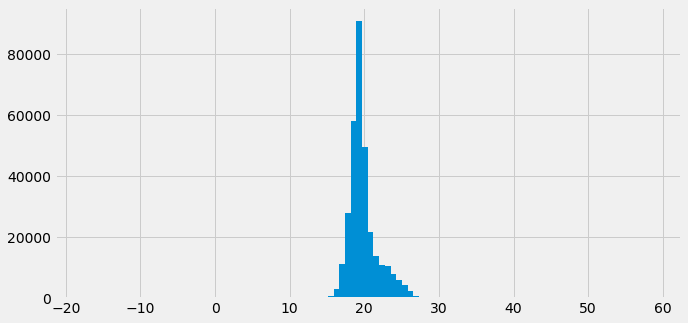

In [24]:
trn['u'].hist(bins=100)

In [25]:
trn['redshift'].quantile(np.arange(0, 1, .0001)) #분위수 확인

0.00e+00   -166.05
1.00e-04     -8.23
2.00e-04     -4.36
3.00e-04     -2.49
4.00e-04     -1.81
             ...  
1.00e+00      1.59
1.00e+00      2.05
1.00e+00      2.93
1.00e+00      4.69
1.00e+00      8.57
Name: redshift, Length: 10000, dtype: float64

In [27]:
trn[trn['u']<0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
113850,-16.87,15.24,14.24,14.53,-7.27,-1.03e-04,24.52,15.14,14.20,14.52,22.85,2,1,1.24,1.25,1.24,1.24,1.25,0
118497,-2.90,15.74,13.98,14.40,16.49,-2.32e-04,23.24,15.63,13.90,14.35,16.85,1,1,1.15,1.15,1.16,1.16,1.15,0
274163,-17.69,-6.00,13.89,14.65,2.13,1.81e-03,24.56,25.06,13.85,14.63,22.81,2,1,1.12,1.12,1.13,1.13,1.12,1


# 라벨 수준별 시각화

In [28]:
seed=32152339

In [29]:
trn_sample = trn.sample(n=10000, random_state=seed) #시각화의 경우 시간 소요가 오래걸리므로 10000개만 표본추출

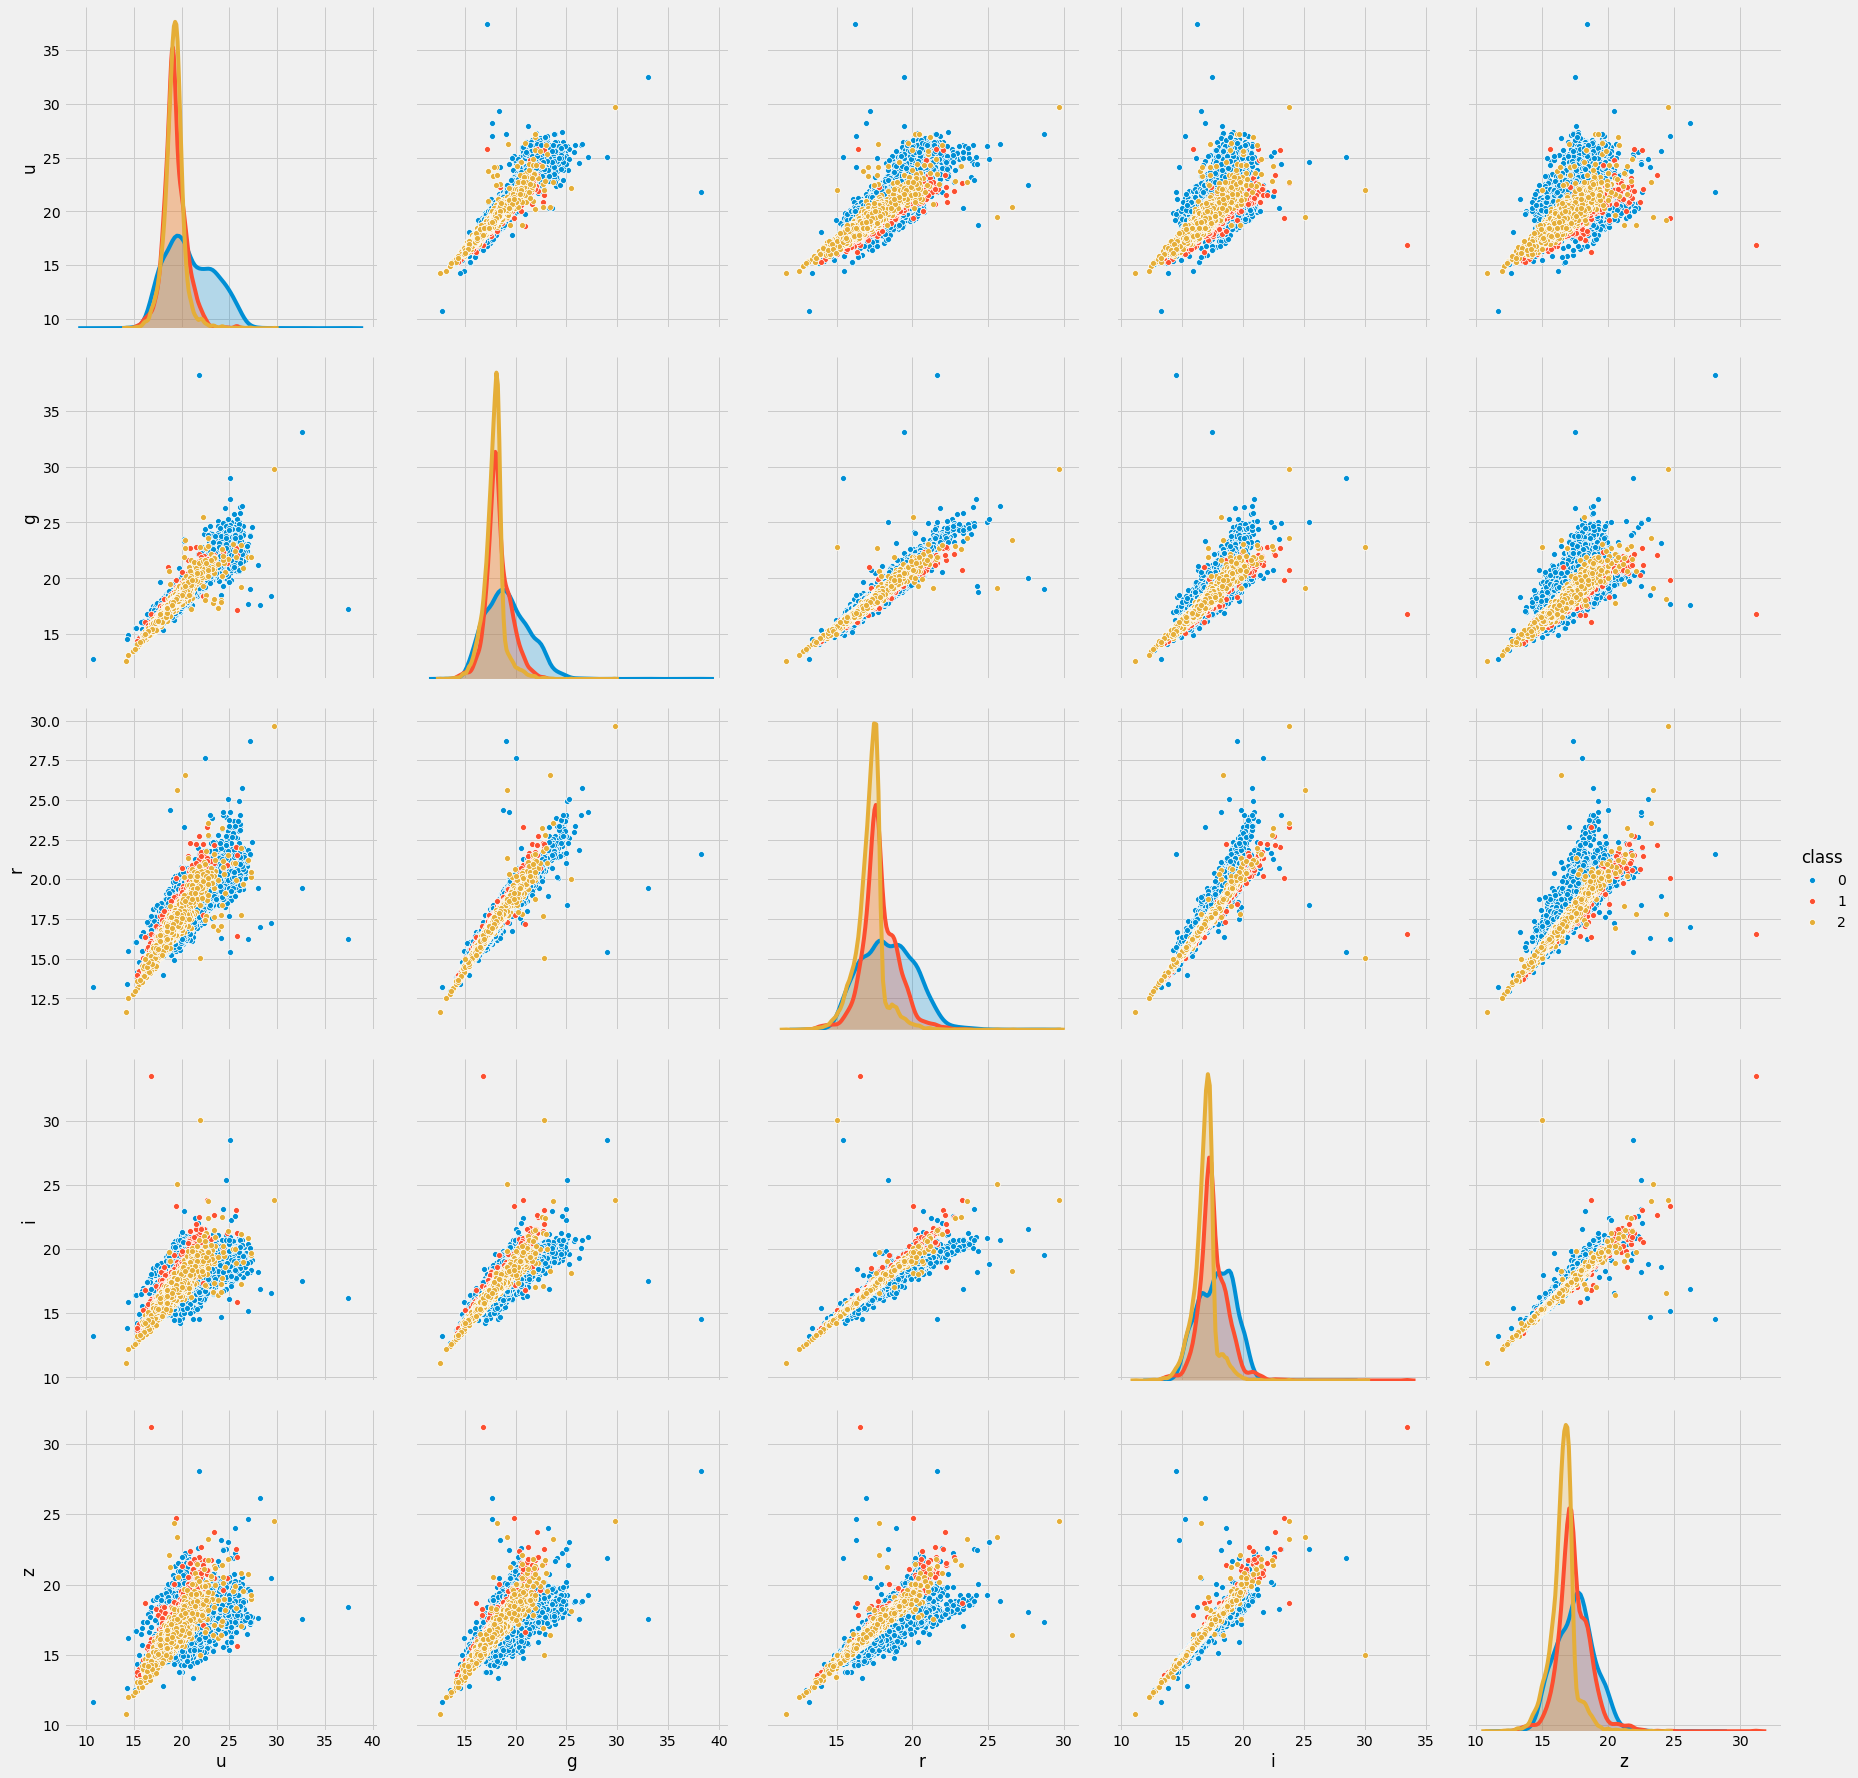

In [30]:
sns.pairplot(data=trn_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5) 
#0의 경우 상대적으로 타 class와 뚜렷이 구분되어 보임.
#1과 2의 경우 비슷한 분포를 보임.

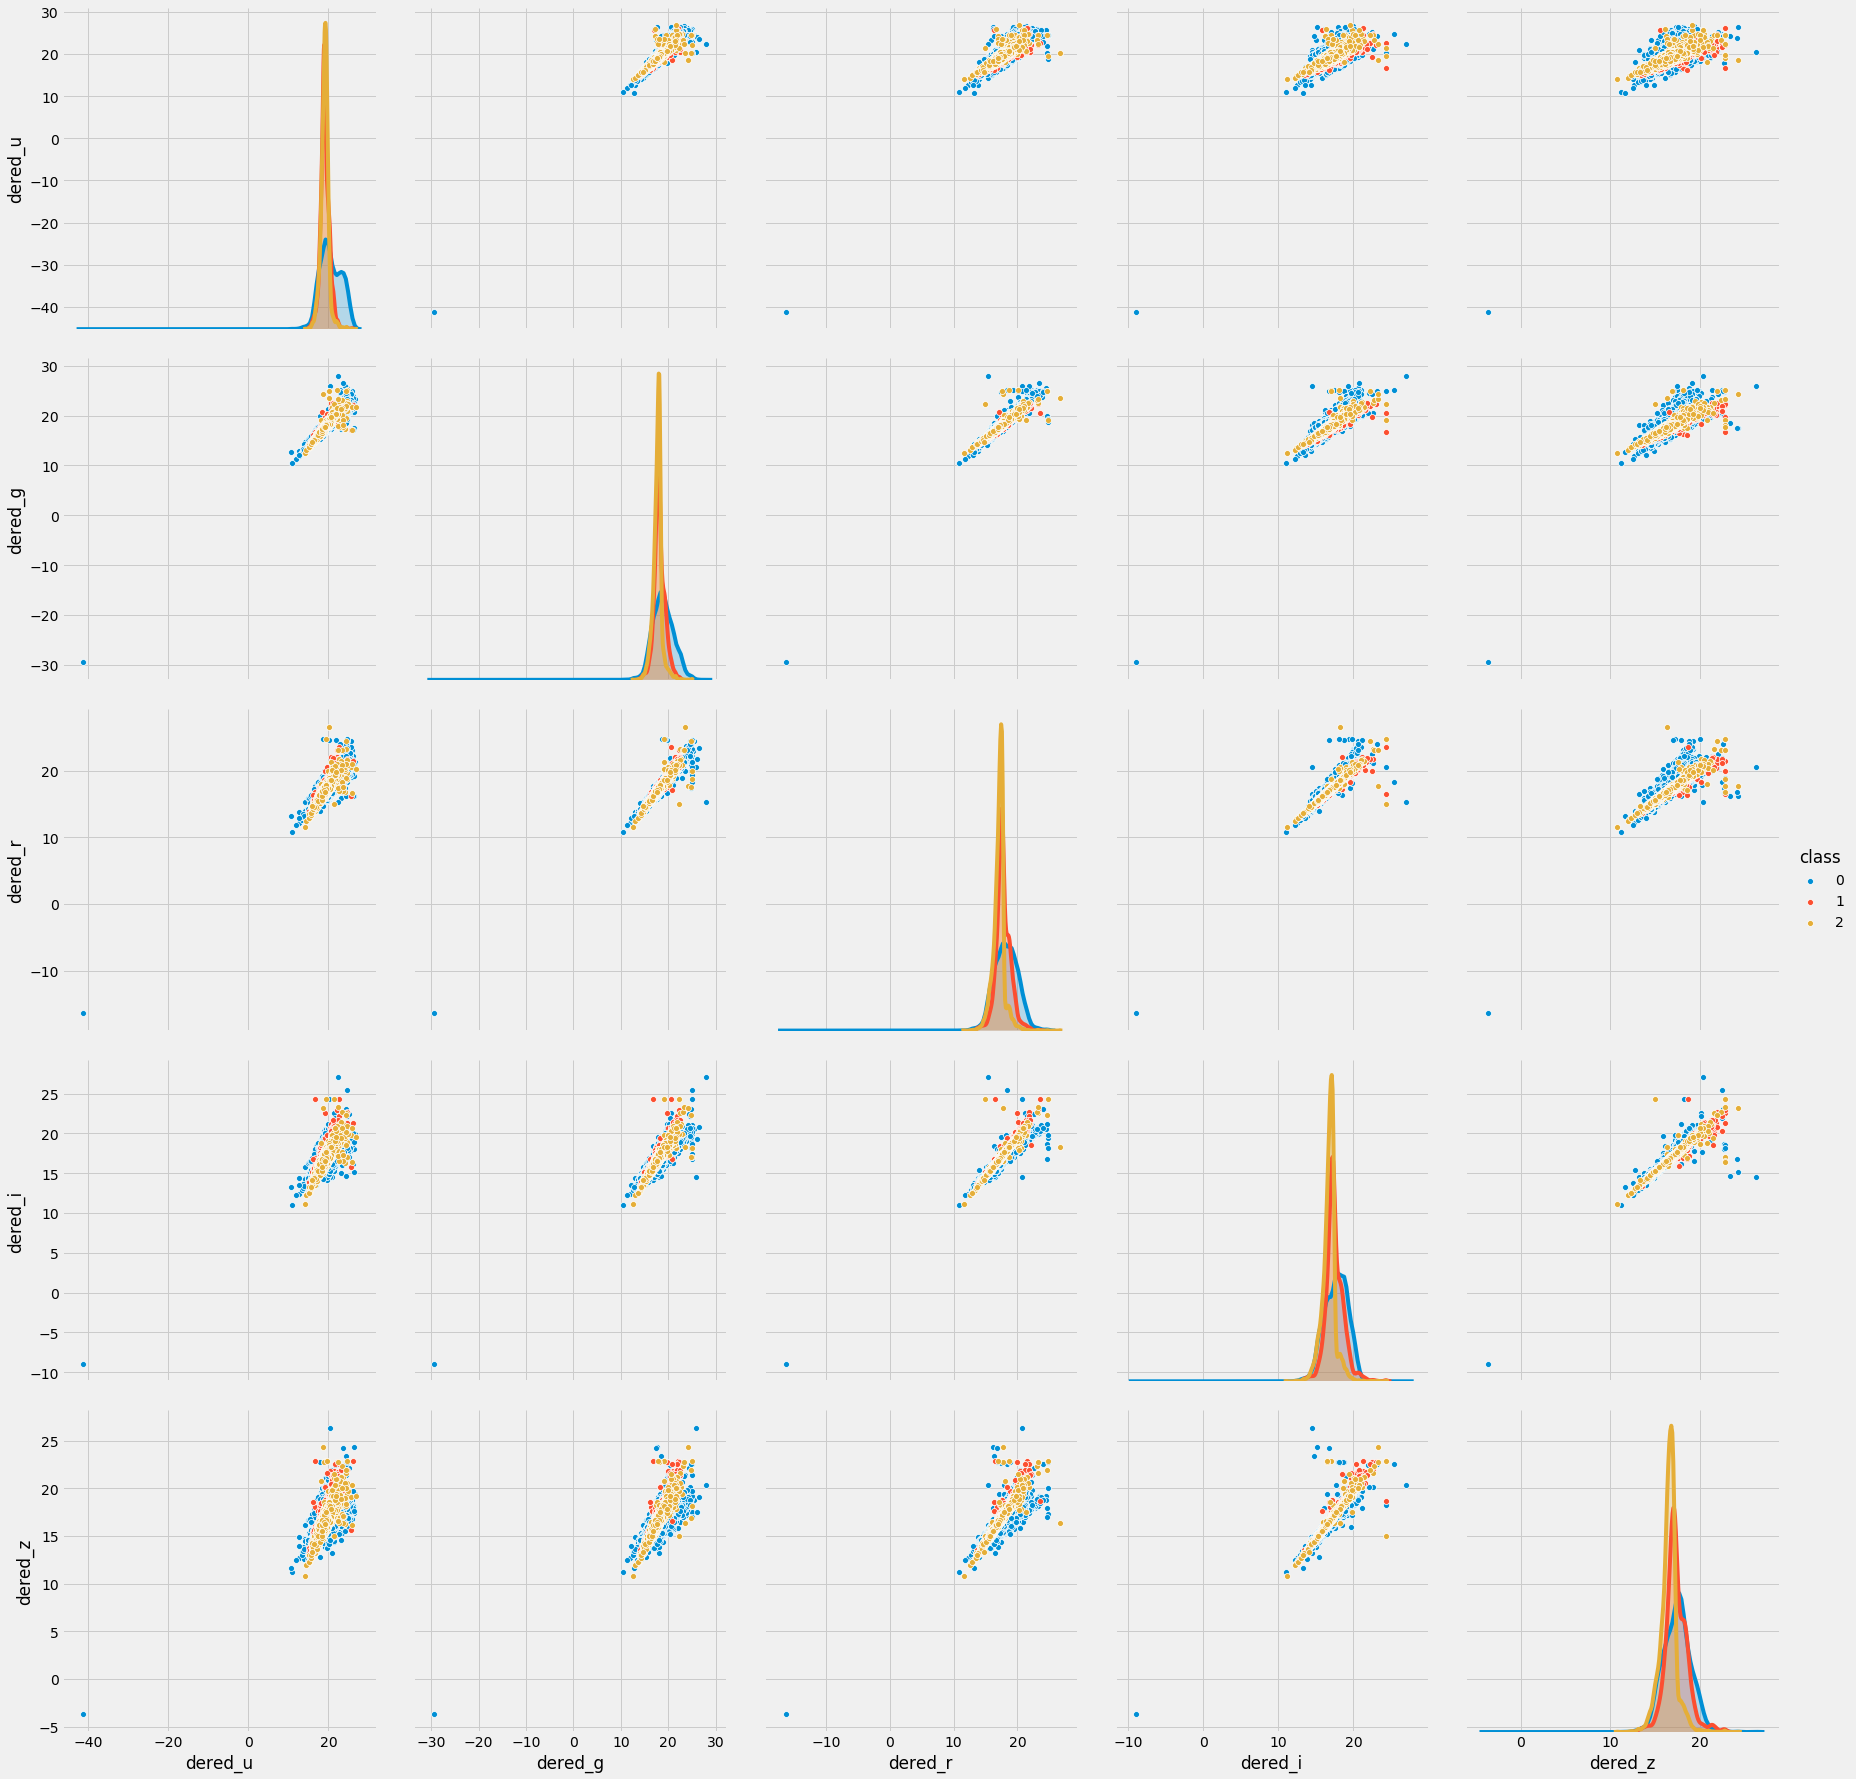

In [31]:
sns.pairplot(data=trn_sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)
#위와 비슷한 형태

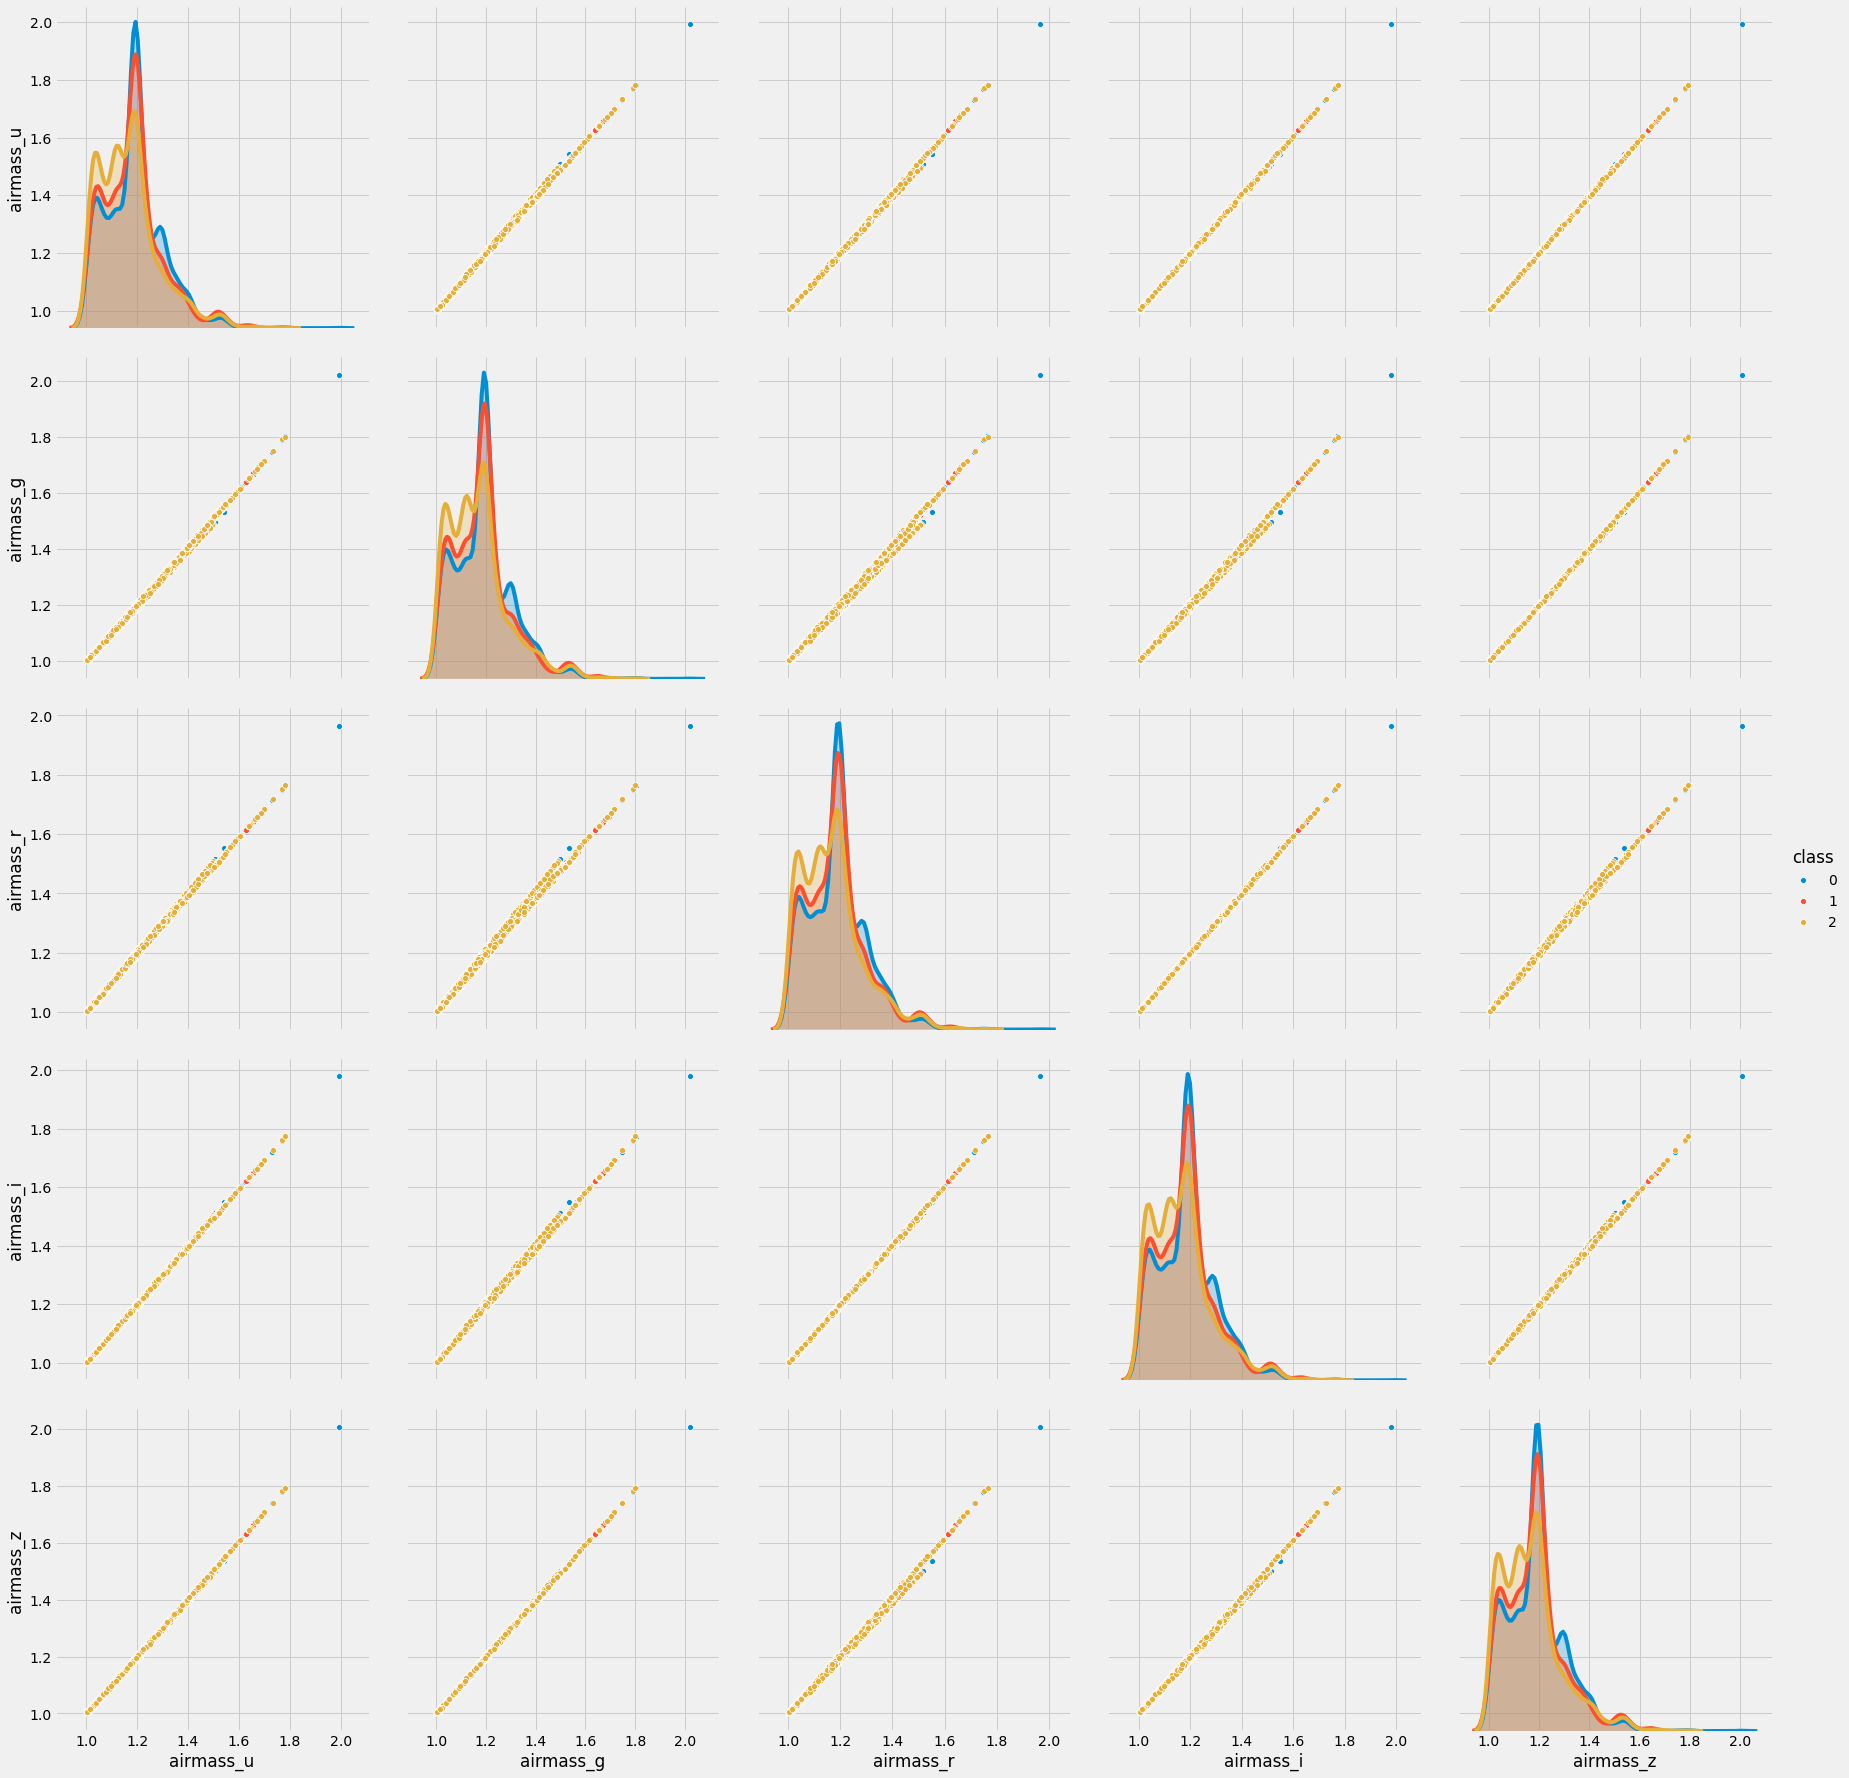

In [32]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)
#아래와 같이 상관계수가 1에 가까워보이므로 상관계수 확인 필요. 상관계수가 1에 과도하게 가깝다면 변수 통합.

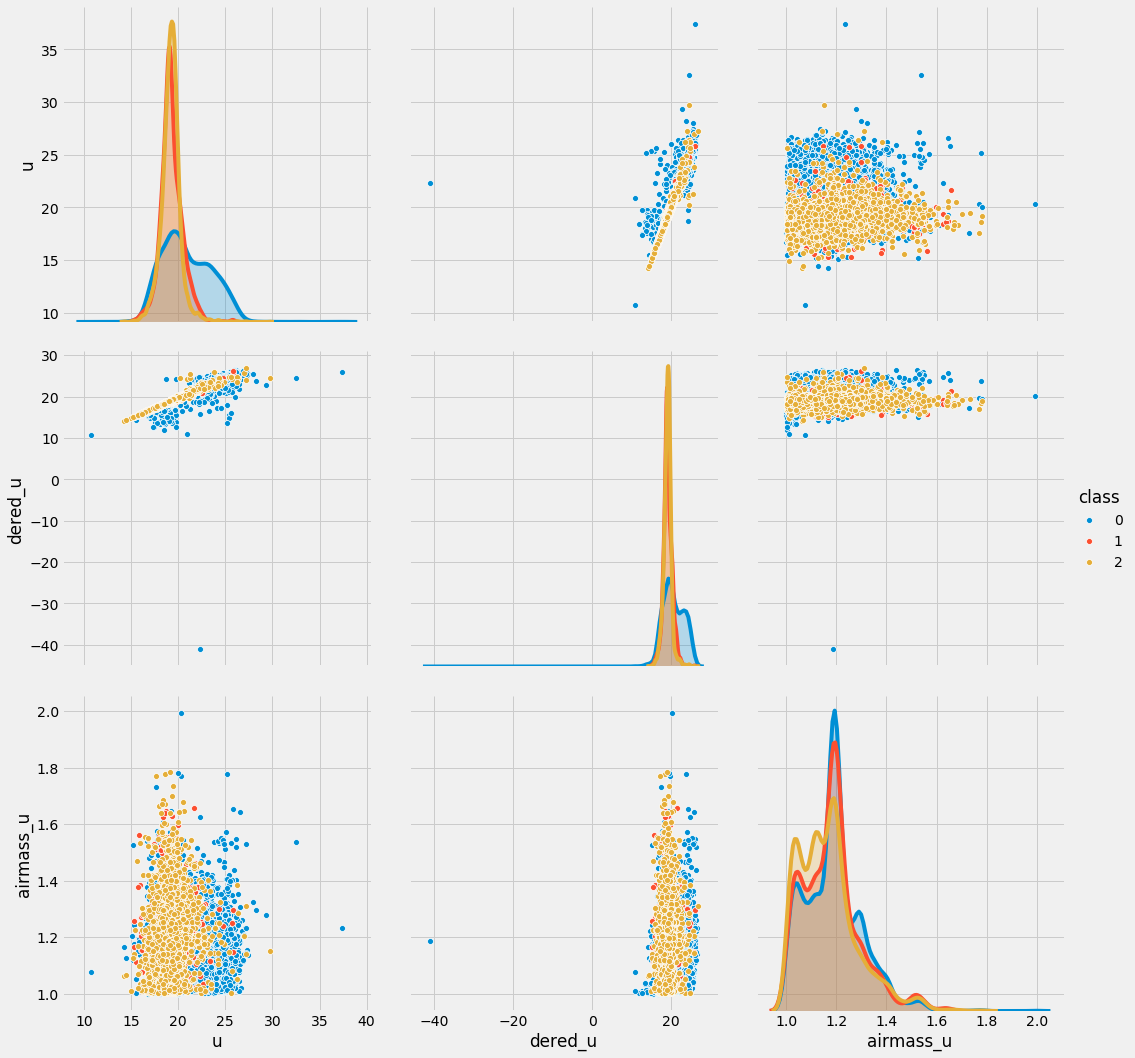

In [33]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

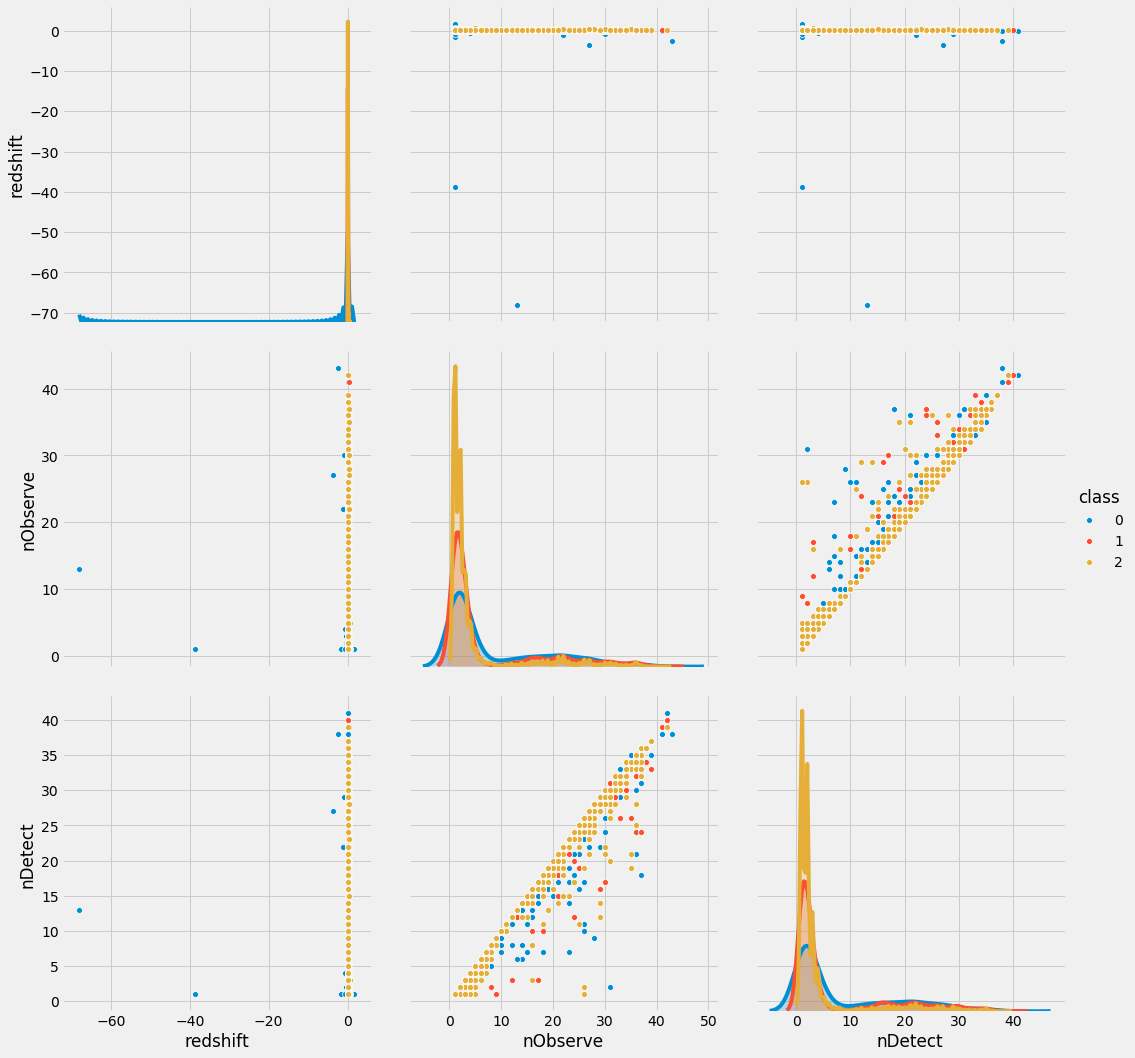

In [34]:
sns.pairplot(data=trn_sample, vars=['redshift', 'nObserve', 'nDetect'], hue='class', size=5)

In [35]:
trn.groupby('class').mean()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
class,,,,,,,,,,,,,,,,,,
0,20.86,19.21,18.39,17.84,17.55,-2.38e-03,20.52,18.95,18.21,17.70,17.45,8.56,8.31,1.19,1.19,1.19,1.19,1.19
1,19.27,17.88,17.84,17.13,17.01,1.05e-01,19.11,17.93,17.75,17.24,17.13,7.05,6.76,1.18,1.18,1.18,1.18,1.18
2,19.24,17.87,17.20,16.68,16.32,9.18e-02,19.09,17.76,17.12,16.71,16.35,4.44,4.31,1.17,1.17,1.17,1.17,1.17


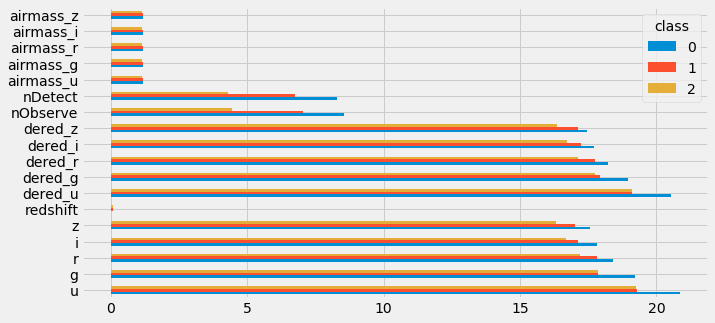

In [36]:
trn.groupby('class').mean().T.plot(kind='barh')

### 시험 데이터 로드

In [37]:

tst = pd.read_csv('C:/python/DACON_DATA/test.csv')
print(tst.shape)
tst.head()

(80000, 19)


,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
0,320000,19.14,18.02,17.47,17.11,16.93,1.21e-01,19.07,17.95,17.43,17.08,16.91,1,1,1.16,1.15,1.16,1.16,1.15
1,320001,18.74,17.17,16.37,15.99,15.73,-6.69e-05,15.07,14.31,14.39,14.52,14.64,2,2,1.01,1.01,1.01,1.01,1.01
2,320002,19.30,17.88,17.22,16.81,16.64,1.10e-01,19.10,17.77,17.15,16.75,16.57,1,1,1.38,1.39,1.37,1.38,1.39
3,320003,18.08,17.16,16.90,16.81,16.80,2.97e-05,17.97,17.07,16.85,16.77,16.77,1,1,1.14,1.14,1.14,1.14,1.14
4,320004,17.83,16.76,16.21,15.87,15.66,6.85e-02,17.75,16.68,16.16,15.83,15.64,2,2,1.11,1.11,1.11,1.11,1.11


In [ ]:
tst.describe()

### 학습/시험 데이터 결합

In [38]:
df = pd.concat([trn, tst], axis=0)
print(df.shape)
df.tail()

(400000, 20)


,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_i,dered_r,dered_u,dered_z,g,i,id,nDetect,nObserve,r,redshift,u,z
79995,1.19,1.19,1.19,1.19,1.19,NaN,18.39,17.99,18.09,19.34,17.97,18.66,18.12,399995.0,17,17,18.27,-3.17e-04,19.67,18.06
79996,1.29,1.28,1.28,1.28,1.29,NaN,20.64,20.95,20.55,21.40,20.78,20.73,21.00,399996.0,4,8,20.61,6.55e-02,21.52,20.85
79997,1.19,1.19,1.19,1.19,1.19,NaN,17.88,18.00,17.90,18.91,18.04,18.24,18.20,399997.0,1,1,18.16,-8.42e-04,19.40,18.20
79998,1.18,1.18,1.18,1.18,1.18,NaN,17.49,16.77,17.06,18.77,16.56,17.60,16.82,399998.0,17,17,17.13,4.28e-02,18.90,16.59
79999,1.18,1.19,1.19,1.18,1.18,NaN,20.22,20.67,20.39,20.50,20.91,20.43,20.77,399999.0,5,5,20.54,2.85e-04,20.76,20.97


In [39]:
df.fillna(0, inplace=True)
df.tail()

,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_i,dered_r,dered_u,dered_z,g,i,id,nDetect,nObserve,r,redshift,u,z
79995,1.19,1.19,1.19,1.19,1.19,0.0,18.39,17.99,18.09,19.34,17.97,18.66,18.12,399995.0,17,17,18.27,-3.17e-04,19.67,18.06
79996,1.29,1.28,1.28,1.28,1.29,0.0,20.64,20.95,20.55,21.40,20.78,20.73,21.00,399996.0,4,8,20.61,6.55e-02,21.52,20.85
79997,1.19,1.19,1.19,1.19,1.19,0.0,17.88,18.00,17.90,18.91,18.04,18.24,18.20,399997.0,1,1,18.16,-8.42e-04,19.40,18.20
79998,1.18,1.18,1.18,1.18,1.18,0.0,17.49,16.77,17.06,18.77,16.56,17.60,16.82,399998.0,17,17,17.13,4.28e-02,18.90,16.59
79999,1.18,1.19,1.19,1.18,1.18,0.0,20.22,20.67,20.39,20.50,20.91,20.43,20.77,399999.0,5,5,20.54,2.85e-04,20.76,20.97


### 피쳐 변환

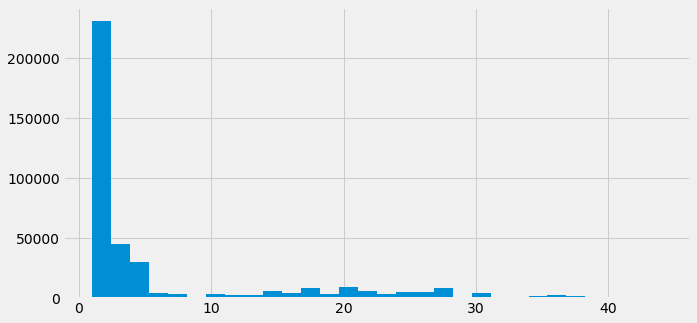

In [40]:
df['nObserve'].hist(bins=30)

In [41]:
df['nObserve'] = df['nObserve'].apply(np.log1p)

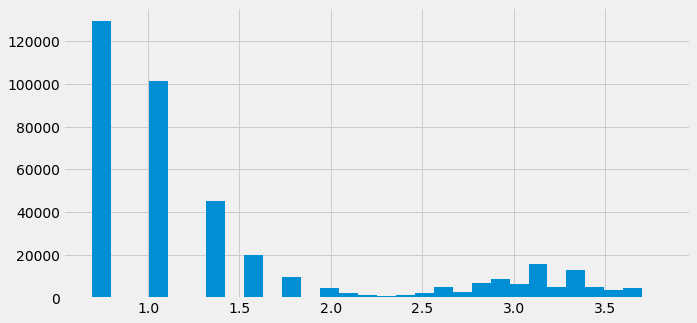

In [42]:
df['nObserve'].hist(bins=30)

### 피쳐 생성

In [43]:
df['d_dered_u'] = df['dered_u'] - df['u']
df['d_dered_g'] = df['dered_g'] - df['g']
df['d_dered_r'] = df['dered_r'] - df['r']
df['d_dered_i'] = df['dered_i'] - df['i']
df['d_dered_z'] = df['dered_z'] - df['z']
df['d_dered_rg'] = df['dered_r'] - df['dered_g']
df['d_dered_ig'] = df['dered_i'] - df['dered_g']
df['d_dered_zg'] = df['dered_z'] - df['dered_g']
df['d_dered_ri'] = df['dered_r'] - df['dered_i']
df['d_dered_rz'] = df['dered_r'] - df['dered_z']
df['d_dered_iz'] = df['dered_i'] - df['dered_z']
df['d_obs_det'] = df['nObserve'] - df['nDetect']
print(df.shape)
df.head()

(400000, 32)


,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_i,dered_r,dered_u,...,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
0,1.19,1.19,1.19,1.19,1.19,0.0,20.26,17.63,18.96,23.12,...,-0.05,-0.04,-0.03,-1.30,-2.63,-3.35,1.32,2.05,0.72,-15.06
1,1.26,1.25,1.25,1.25,1.26,1.0,14.00,13.24,13.41,14.97,...,-0.04,-0.03,-0.03,-0.59,-0.77,-0.87,0.18,0.28,0.10,-0.31
2,1.02,1.02,1.02,1.02,1.02,0.0,15.69,15.32,15.44,16.61,...,-0.10,-0.07,-0.05,-0.25,-0.36,-0.39,0.12,0.14,0.03,-0.90
3,1.21,1.21,1.20,1.21,1.21,0.0,20.99,19.79,20.09,25.35,...,-0.13,-0.10,-0.08,-0.91,-1.20,-1.44,0.29,0.53,0.24,-1.39
4,1.19,1.19,1.19,1.19,1.19,0.0,20.43,18.19,18.86,23.77,...,-0.18,-0.13,-0.11,-1.57,-2.24,-2.56,0.67,0.99,0.31,-9.36


### 피쳐 삭제

In [44]:
trn.corr().style.background_gradient()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1,0.049,0.82,0.017,0.014,-0.0092,0.94,0.081,0.78,0.035,0.021,0.23,0.22,0.076,0.076,0.076,0.076,0.076,-0.38
g,0.049,1,0.05,0.59,0.54,-0.00036,0.047,1,0.048,0.71,0.5,0.012,0.011,0.002,0.0019,0.0021,0.002,0.002,-0.02
r,0.82,0.05,1,0.023,0.019,-0.0063,0.81,0.086,0.97,0.047,0.031,0.21,0.2,0.076,0.076,0.077,0.076,0.076,-0.37
i,0.017,0.59,0.023,1,0.92,-0.00015,0.018,0.59,0.022,0.99,0.7,0.0056,0.0056,-0.00076,-0.00083,-0.00068,-0.00072,-0.00079,-0.01
z,0.014,0.54,0.019,0.92,1,-0.00016,0.014,0.54,0.019,0.91,0.92,0.0052,0.0052,-0.0015,-0.0015,-0.0014,-0.0014,-0.0015,-0.01
redshift,-0.0092,-0.00036,-0.0063,-0.00015,-0.00016,1,-0.0076,-0.00019,-0.003,-0.00011,-0.0002,-0.0078,-0.0076,0.0014,0.0014,0.0014,0.0014,0.0014,0.074
dered_u,0.94,0.047,0.81,0.018,0.014,-0.0076,1,0.087,0.84,0.038,0.023,0.22,0.22,0.088,0.088,0.089,0.088,0.088,-0.34
dered_g,0.081,1,0.086,0.59,0.54,-0.00019,0.087,1,0.089,0.71,0.5,0.02,0.019,0.0059,0.0058,0.006,0.0059,0.0058,-0.03
dered_r,0.78,0.048,0.97,0.022,0.019,-0.003,0.84,0.089,1,0.049,0.032,0.2,0.19,0.084,0.083,0.084,0.084,0.084,-0.34
dered_i,0.035,0.71,0.047,0.99,0.91,-0.00011,0.038,0.71,0.049,1,0.71,0.011,0.011,0.0018,0.0017,0.0019,0.0018,0.0017,-0.018


In [45]:
df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg', 'd_dered_ri'], 
        axis=1, inplace=True)
print(df.shape)
df.head()

(400000, 21)


,airmass_u,class,dered_g,dered_i,dered_r,dered_u,dered_z,id,nObserve,redshift,...,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
0,1.19,0.0,20.26,17.63,18.96,23.12,16.91,0.0,2.94,-8.11e-05,...,-0.14,-0.08,-0.05,-0.04,-0.03,-2.63,-3.35,2.05,0.72,-15.06
1,1.25,1.0,14.00,13.24,13.41,14.97,13.13,0.0,0.69,4.51e-03,...,-0.09,-0.06,-0.04,-0.03,-0.03,-0.77,-0.87,0.28,0.10,-0.31
2,1.02,0.0,15.69,15.32,15.44,16.61,15.30,0.0,1.10,4.72e-04,...,-0.18,-0.14,-0.10,-0.07,-0.05,-0.36,-0.39,0.14,0.03,-0.90
3,1.21,0.0,20.99,19.79,20.09,25.35,19.56,0.0,1.61,5.81e-06,...,-0.31,-0.19,-0.13,-0.10,-0.08,-1.20,-1.44,0.53,0.24,-1.39
4,1.19,0.0,20.43,18.19,18.86,23.77,17.88,0.0,2.64,-3.32e-05,...,-0.68,-0.27,-0.18,-0.13,-0.11,-2.24,-2.56,0.99,0.31,-9.36


### 새로운 학습 데이터 파일 저장

In [ ]:
# df.to_csv(feature_file)

In [ ]:
# !ls -alF ../input/

In [ ]:
# feature = pd.read_csv(feature_file)
# print(feature.shape)
# feature.head()

In [ ]:
# feature.corr().style.background_gradient()